In [1]:
from typing import List
import nhl_dataset
import glob
import os
import pandas as pd
import json
import nhl_tidy_data 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from nhl_tidy_data import convert_raw_data_to_panda_csv
plt.style.use('seaborn-deep')


SHOT_TYPE='shot_type'
EVENT_TYPE='event_type'
coord_x='coordinates_x'
coord_y='coordinates_y'
PERIOD='period'
HOME='team_home'
RINK='team_rink_side_right'
DISTANCE='distance'
SHOT='SHOT'
GOAL='GOAL'
PROBABILITIES='probabilities'


In [2]:
date_season=[2016,2017,2018,2019,2020]
dataset = nhl_dataset.NhlDataset()
#dataset.load_all(date_season)
for season in date_season:
    convert_raw_data_to_panda_csv(dataset, f'./data/df_{season}.csv', [season])

No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rink side
No valid rin

In [20]:
def question5_1(seasons: int, csv_path='./data/df', size_fig=(10,15)):
    fig,axes=plt.subplots(1,len(seasons), figsize=size_fig,squeeze=False )
    shot_type_goal_count_df=None
    for season in seasons:
        aux=csv_path + f'_{season}'+'.csv'
        data=pd.read_csv(aux)
        shot_goal_df=data[[SHOT_TYPE,EVENT_TYPE]]
        shot_goal_ds=shot_goal_df.groupby(shot_goal_df[EVENT_TYPE]).value_counts()
        shot_type_goal_count_df=pd.concat( [shot_goal_ds.loc[SHOT,],shot_goal_ds.loc[GOAL,]],axis=1)
        shot_type_goal_count_df.columns=[SHOT,GOAL]
        labels_x=list(shot_type_goal_count_df.index)
        plt.xticks(rotation = 45)
        axes[0,seasons.index(season)].bar(labels_x,shot_type_goal_count_df[SHOT],width=0.5,label = SHOT)
        axes[0,seasons.index(season)].bar(labels_x,shot_type_goal_count_df[GOAL],width=0.5,label = GOAL)
        for tick in axes[0,seasons.index(season)].get_xticklabels():
            tick.set_rotation(45)
        axes[0,seasons.index(season)].legend()
        axes[0,seasons.index(season)].set_title(f'Goal during the season-{season}')
        plt.savefig(f'shot_goal_season_{season}.png')
    

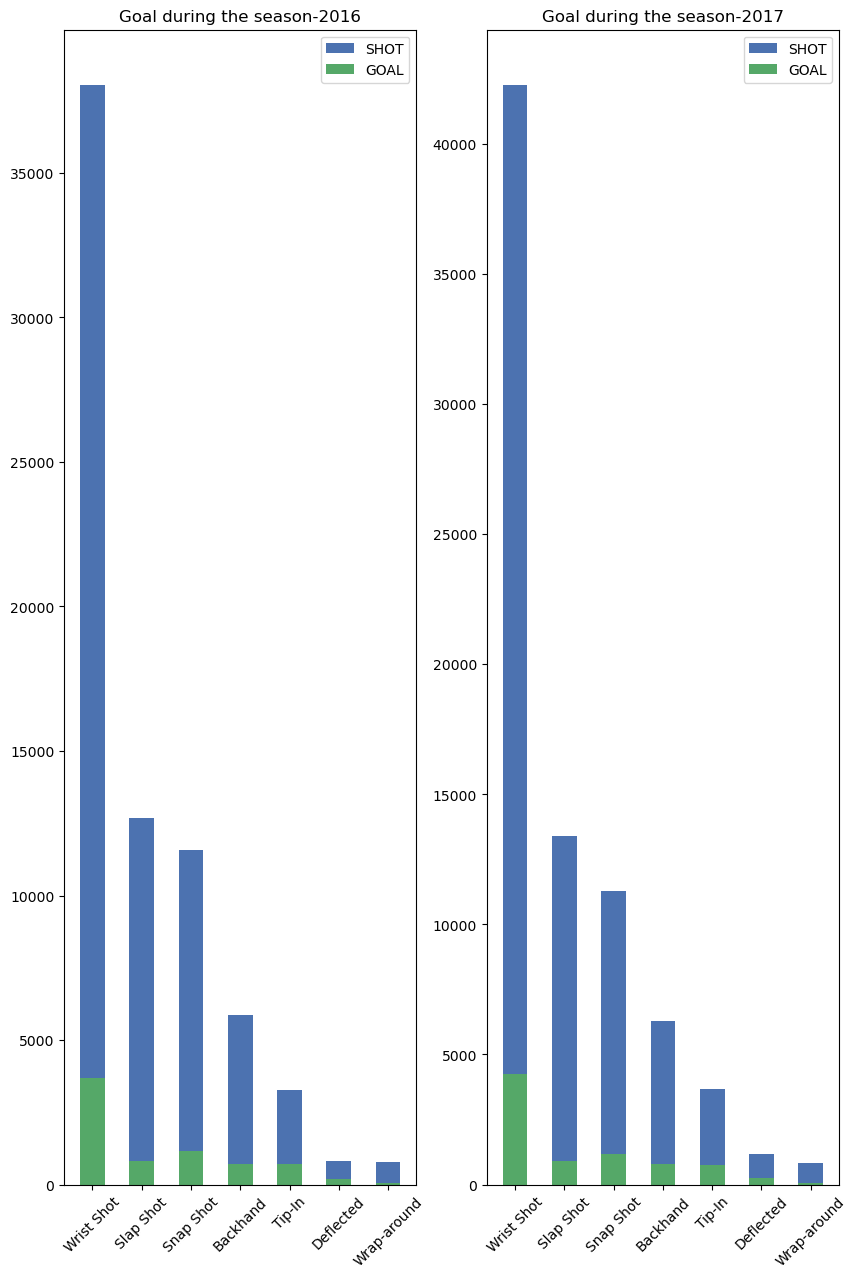

In [21]:
question5_1(seasons=[2016,2017], csv_path='./data/df')

Question 1:
Le graphique ci-dessous donne la relation entre les differents type de tirs et les buts associes à ces tirs. Le tir le plus courant  le Wrist-Shot. A premiere vue le tir plus dangeureux est le  wrist-shot
    

In [22]:
def get_distance_to_adverse_goal(x: float, y: float, team_rink_side:str):
    x_goal_opponent=-89
    y_goal_opponent=0.0
    
    if(team_rink_side==False):
        x_goal_opponent= 89.0
        y_goal_opponent= 0.0
        
    return np.sqrt(  (x-x_goal_opponent)**2 + (y-y_goal_opponent)**2 )

def add_distance_colum(seasons: int,csv_path='./data/df'):
    out_put_dic={}
    for season in seasons:
        distance=None 
        aux=csv_path + f'_{season}'+'.csv'
        data=pd.read_csv(aux)
        my_function=lambda row :get_distance_to_adverse_goal(x=row[coord_x], y=row[coord_y],team_rink_side=row[RINK] )
        distance=data[[coord_x,coord_y,RINK]].apply(func=my_function, axis=1)
        data[DISTANCE]=distance
        out_put_dic[season]=data
    return out_put_dic


In [23]:
def question5_2(out_put_dic, n_bins = 21,csv_path='./data/df', size_fig=(17,14)):
    fig,axs = plt.subplots( 1,len(seasons), figsize = size_fig,squeeze=False  )
    
    for season in out_put_dic.keys():
        shot_df=out_put_dic[season].copy()
        goal=shot_df[shot_df[EVENT_TYPE]==GOAL]
        goal_index=goal[goal==True].index
        goal_df=shot_df.loc[goal_index,: ].copy()
        #goal_dict[season]=goal_df
        axs[0,seasons.index(season)].hist([shot_df[DISTANCE],goal_df[DISTANCE] ],align='right', bins=n_bins,label=['shot','goal'], alpha=0.5)
        axs[0,seasons.index(season)].set_xlabel('distance')
        axs[0,seasons.index(season)].set_ylabel('number-shot')
        
        axs[0,seasons.index(season)].legend(prop={'size': 10})
        axs[0,seasons.index(season)].set_title(f'season-{season}')
        plt.savefig(f'question2_1_goal_distance_season_{season}.png')
        
    

In [24]:
seasons=[2018,2019,2020]
out_put_dic=add_distance_colum(seasons,csv_path='./data/df')

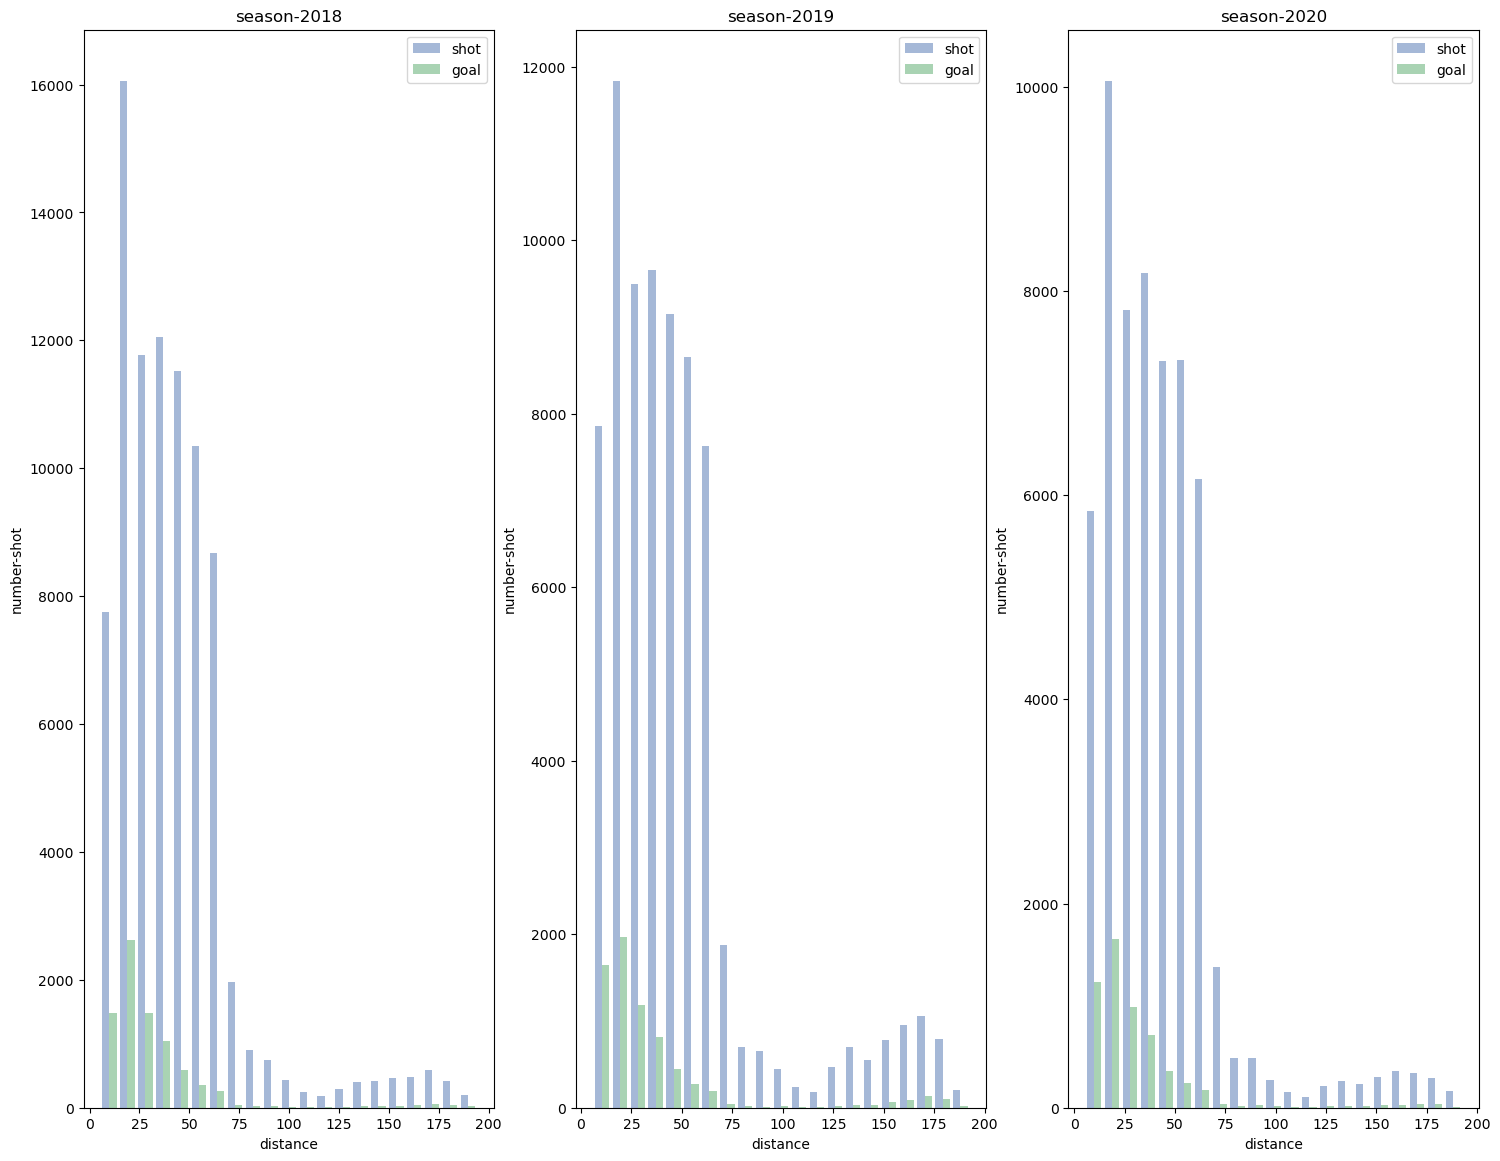

In [25]:
question5_2(out_put_dic, csv_path='./data/df',size_fig=(18,14))

Question 2:
on a divise la longueur du stade qui est de 200 pieds en  20 petits espaces de 10 pieds chacun. pour avoir des intervalles de la forme $[0,10], [10,20], [20,30],...[190,200]$. Ainsi on compte le nombre de tirs ou de buts donc la distance(par rapport au goal ) se retrouve dans chacun de ces sous-intervalles. 
L'image ci-dessus indique la relation entre le nombre de tirs et de buts. On peut conclure qu'il y a plus de tirs et de buts pour les distances comprises dans l'intervale $[10,20]$. 

In [26]:
def bin_counts(df: pd.DataFrame, bins: list):
    rating=pd.to_numeric(df[DISTANCE]).dropna()
    hist=pd.DataFrame(index=range(0,len(bins)-1), columns= [DISTANCE, 'count', 'probabilities'])
    
    for item in range(0,len(bins)-1):
        aux= bins[item]<=rating 
        my_index=aux[aux==True].index
        aux=rating.loc[my_index]<=bins[item+1]
        my_index=aux[aux==True].index
        hist.loc[item,DISTANCE]=bins[item+1]
        hist.loc[item,'count']=len(my_index)
        hist.loc[item,'probabilities']=len(my_index)/rating.count()
    return hist

In [27]:

bins=list(np.linspace(0,200,21))
# bin_counts(out_put_dic[2018],bins)

In [28]:
def question5_22(out_put_dic,csv_path='./data/df', size_fig=(17,14),bins =np.linspace(0,200,21)):
    fig,axs = plt.subplots( 1,len(seasons), figsize = size_fig,squeeze=False  )
    
    for season in out_put_dic.keys():
        shot_df=out_put_dic[season].copy()
        goal=shot_df[shot_df[EVENT_TYPE]==GOAL]
        goal_index=goal[goal==True].index
        goal_df=shot_df.loc[goal_index,: ].copy()
        probabilities=bin_counts(goal_df, bins) 
        
        axs[0,seasons.index(season)].bar(probabilities[DISTANCE],probabilities[PROBABILITIES],width=0.5)
        axs[0,seasons.index(season)].set_xlabel('distance')
        axs[0,seasons.index(season)].set_ylabel('probabilities')
        axs[0,seasons.index(season)].legend()
        
        axs[0,seasons.index(season)].legend(prop={'size': 10})
        axs[0,seasons.index(season)].set_title(f'season-{season}')
        plt.savefig(f'question_22_goal_distance_season_{season}.png')
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


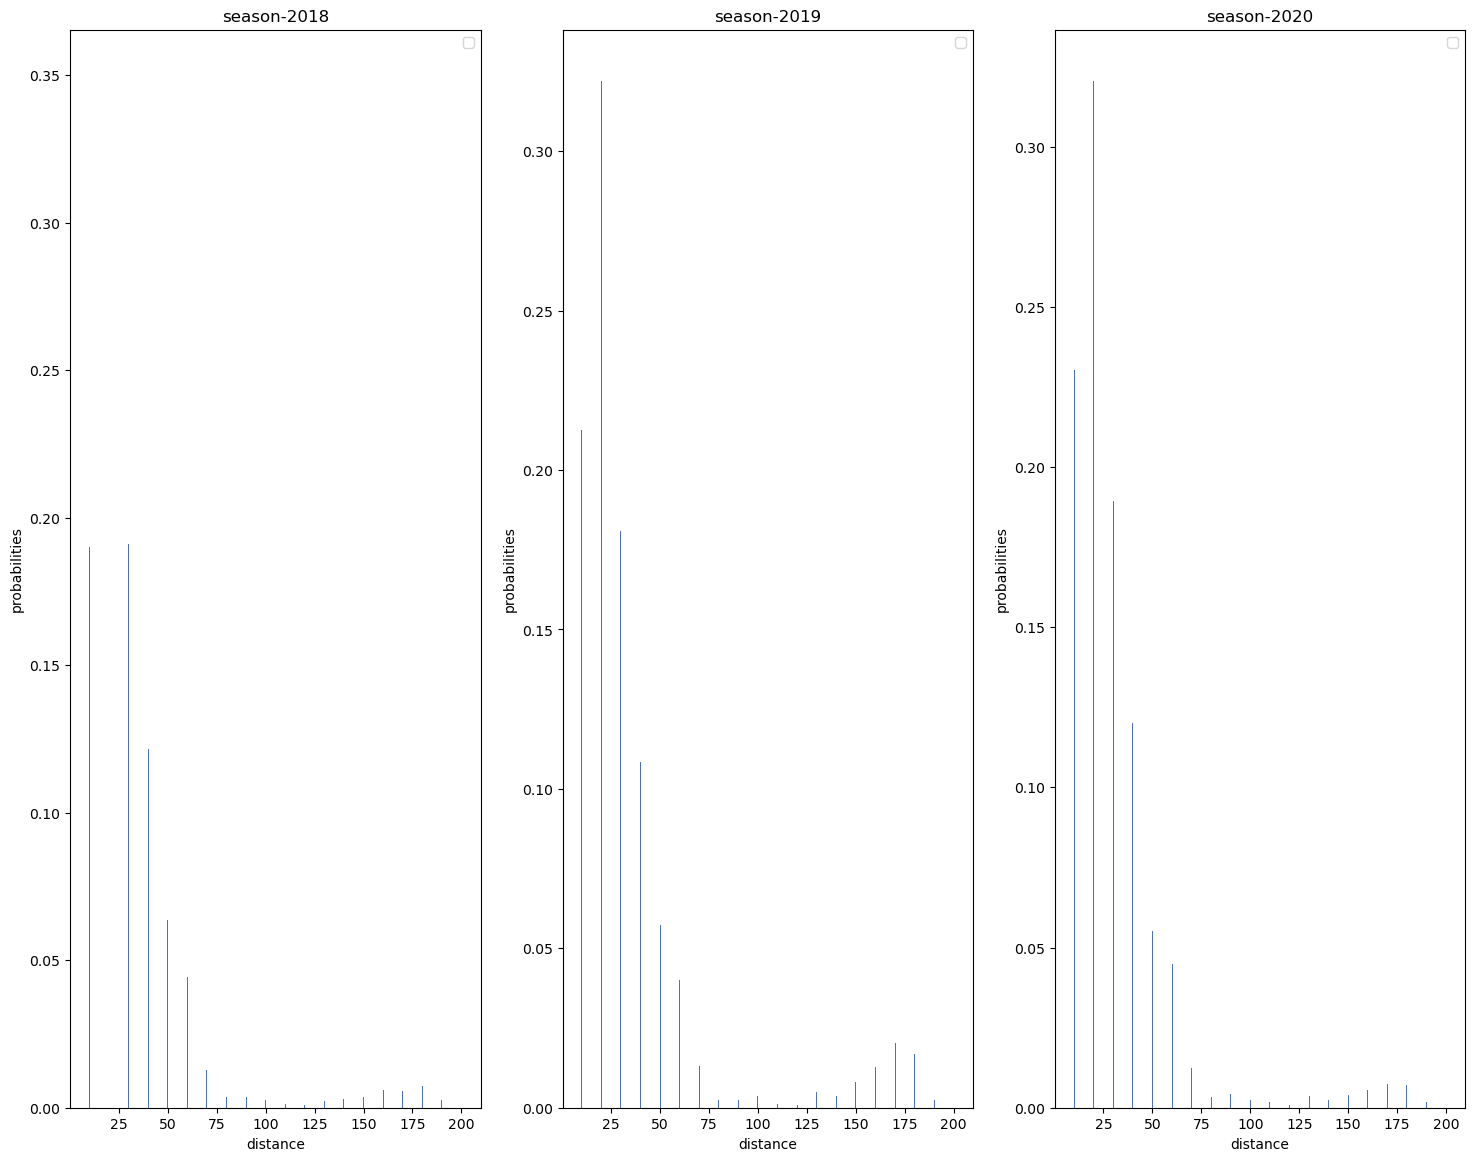

In [29]:
question5_22(out_put_dic, csv_path='./data/df',size_fig=(18,14),bins =np.linspace(0,200,21))

Question 2 Suite:

on a divise la longueur du stade qui est de 200 pieds en  20 petits espaces de 10 pieds chacun. pour avoir des intervalles de la forme $[0,10], [10,20], [20,30],...[190,200]$. Ainsi on compte le nombre de tirs ou de buts donc la distance se retrouve dans chacun de ces sous-intervalles. 

L'image ci-dessus donne la probabilite d'avoir un but pour distance donnee. On peut conclure qu'on a plus de chance de marquer un but pour distance comprise dans l'intervale $[10,20]$. Aussi on remarque que la silhouette du graphe est la meme pour les saisons 2018, 2019, 2020

In [30]:
def get_data_for_type_shot(data_season)->dict:
    type_shot_data_dict={}
    data=data_season.copy()
    type_shot=list(set(data[SHOT_TYPE]))
    for item in type_shot:
        aux=data[data[SHOT_TYPE]==item]
        aux_index=aux[aux==True].index
        type_shot_data_dict[item]=data.loc[aux_index,:]
    return type_shot_data_dict

In [31]:
def question5_3(data_season, season ,bins =np.linspace(0,200,21)):
    
    data=data_season.dropna().copy()
    type_shot_data_dict=get_data_for_type_shot(data)
    fig,axs = plt.subplots(len(type_shot_data_dict.keys() ),1, figsize = (14,14),squeeze=False  )
    fig.tight_layout(pad=5.0)
    probabilities_dict={}
    i=0
    for item, value in type_shot_data_dict.items():
        probabilities=bin_counts(type_shot_data_dict[item], bins) 
        axs[i,0].bar(probabilities[DISTANCE],probabilities[PROBABILITIES])
        axs[i,0].set_xlabel('distance')
        axs[i,0].set_ylabel('probabilities')
        
        axs[i,0].legend(prop={'size': 10})
        axs[i,0].set_title(f'shot-type: {item}')
        i=i+1
        
    plt.savefig(f'probabilities_distance_season_{season}.png')

    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

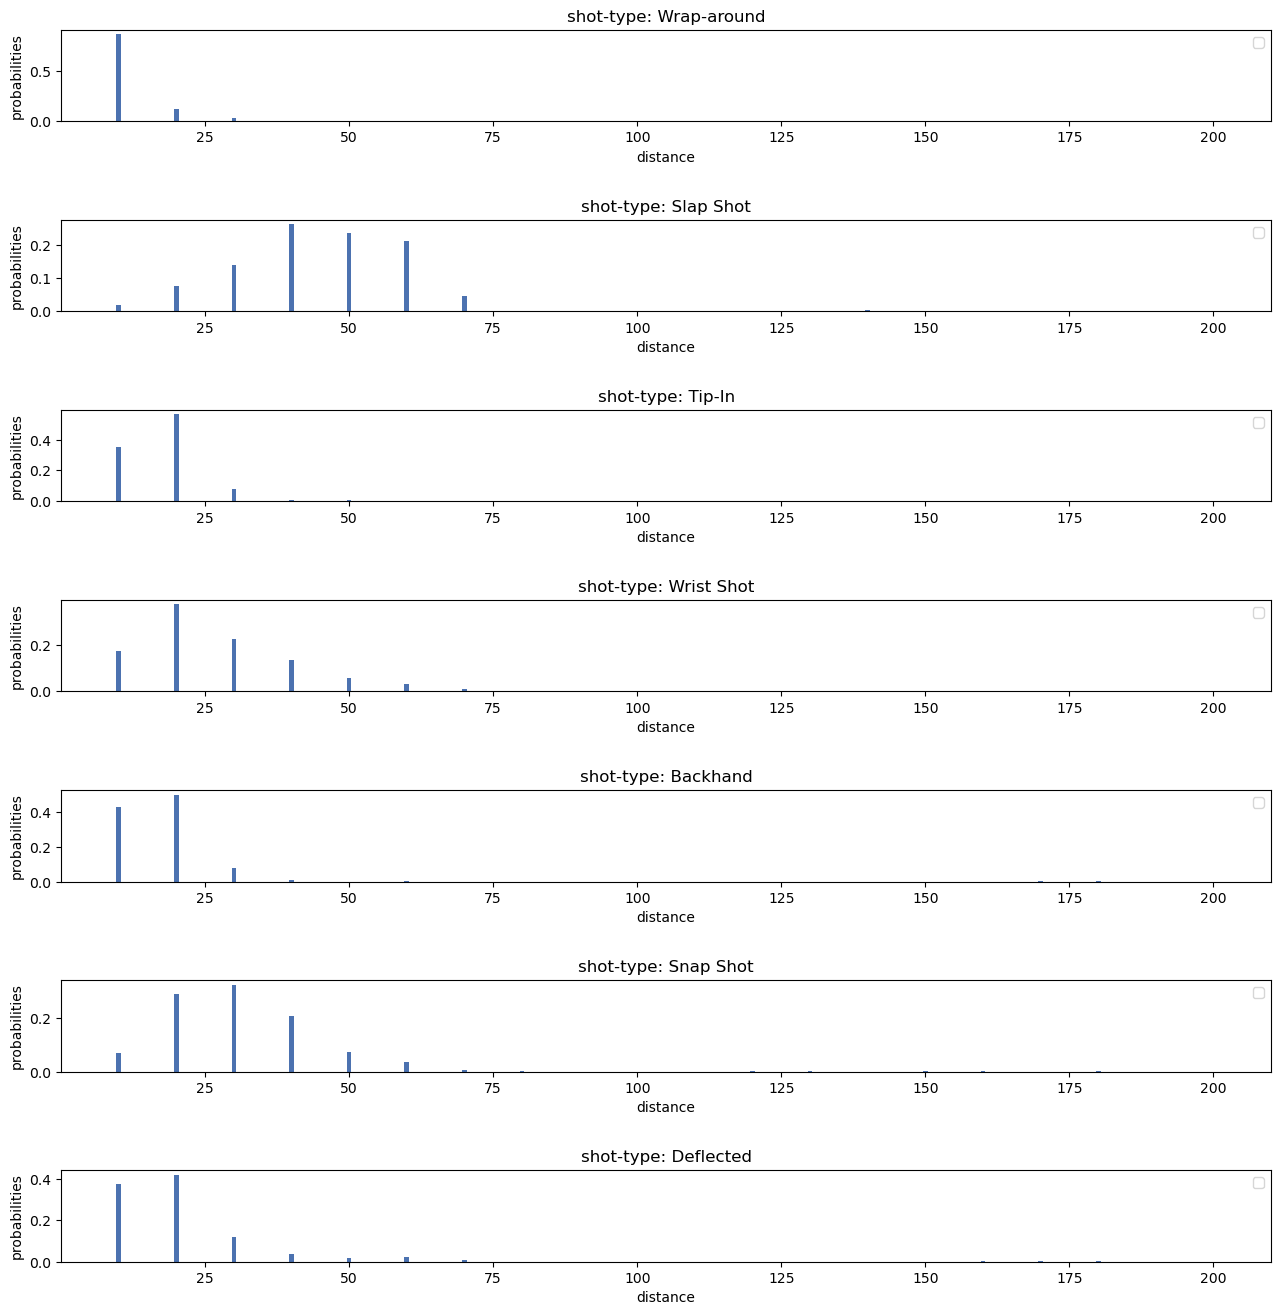

In [32]:
bins=list(np.linspace(0,200,21))
# bin_centers=[0.5*(bins[item] +bins[item+1] ) for item in range(0,len(bins)-1)  ]
question5_3(out_put_dic[2018],2018,bins)

Question 3:
on a divise la longueur du stade qui est de 200 pieds en  20 petits espaces de 10 pieds chacun. pour avoir des intervalles de la forme $[0,10], [10,20], [20,30],...[190,200]$

Le graphique ci-dessus donne la probabilite de marquer le but à une certaine distance pour chaque type de but. 
On remarque a distance:
-entre 0 et 10 pieds de distance du goal: le Wrap-around shot est le tir le plus probable de produire un but, suivi du backhand. 
-entre 10 et 20 pieds de distance du goal : le backhand et Tip-in  sont les tirs les plus probables de produire un but, suivi du deflected
-entre 20 et 30 pied de distance du goal: le snap-shot est le tir le plus probable de produire un but suivi du wrist-shot
-entre 30 et 40 pied de distance du goal: le slap shot est le tir le plus probable suivi du snap-shot
-entre 50 et60 pied de distance du goal:: le le slap shot est le tir le plus probable suivi du snap-shot
